# Importing Libraries

In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
%matplotlib inline

from regression_analysis.fit_model import linear_regression
from regression_analysis.utils import franke
from regression_analysis.utils.plots import triangulation_for_triheatmap as triheatmap
from regression_analysis.fit_model.apply_linear_regression import plot_stat, apply_regression
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.tri import Triangulation
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from matplotlib import cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model

import ipywidgets as widget
from ipywidgets import interact, interactive, fixed, interact_manual

import glob as glob
from IPython.display import Image, display, HTML, Video

import multiprocessing as mp

import os
if not os.path.exists('data'):
    os.makedirs('data')
#note my bootstrap can be wrong. 

print("Number of processors: ", mp.cpu_count())

Number of processors:  8


# Demo for applying regression to Franke data 

In [49]:
n = 100 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

y = franke.Franke(xx1, xx2, noise_var=0.0) #zero mean gaussian noise has variance = var
print(np.max(y))

1.2195347797082343


In [50]:
#create linear regression object by passing input and output data
linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 

## Apply OLS 

In [51]:
print("own OLS")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

print('\n'+ "Scikit OLS")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

own OLS
Train MSE 0.001410114522628253
Test MSE 0.0013356872643718006
Train R2 0.9748089296279824
Test R2 0.9738781746727827
Train bias 0.05597676088407167
Test bias 0.051133332916578754
Train model variance 0.054566646365002545
Test model variance 0.05029718432621037

Scikit OLS
Train MSE 0.0013788757093671539
Test MSE 0.0016198325355494807
Train R2 0.9751005680009313
Test R2 0.9713652027302864
Train bias 0.05537779775131928
Test bias 0.056568689967200735
Train model variance 0.0539989220419531
Test model variance 0.054898671313521545


In [52]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0014012635537023917
Test MSE 0.0014038325530881385
Train R2 0.9747278519261993
Test R2 0.9747232446818235
Train bias 0.05730505912325425
Test bias 0.05744214833559367
Train model variance 0.055857833046078116
Test model variance 0.055950081332726644


## Apply OLS with cross validation sampling

In [53]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0014022085274557465
Test MSE 0.001408637398800588
Train R2 0.9747332275350148
Test R2 0.9745853552705375
Train bias 1.5433252503132483e-12
Test bias 1.4136511074800407e-05
Train model variance 0.005380822539170242
Test model variance 0.005642200825399792


## Apply Ridge regression 

In [54]:
print("own ridge")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

print('\n'+"scikit ridge")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

own ridge
Train MSE 0.005679989981071026
Test MSE 0.005544646534039737
Train R2 0.8980408048898912
Test R2 0.8964607810060322
Train bias 0.05570846965469222
Test bias 0.0535597156100963
Train model variance 0.048066553618386965
Test model variance 0.048245268422475826

scikit ridge
Train MSE 0.0056605767742129495
Test MSE 0.005760812007796378
Train R2 0.8974288920951614
Test R2 0.9011282135998352
Train bias 0.055186861435517494
Test bias 0.05826589648824006
Train model variance 0.0475718594824065
Test model variance 0.04942104666735711


## Apply Ridge regression with bootstrap

In [55]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, reg_method="ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0056549255219222085
Test MSE 0.005727142736381949
Train R2 0.8978382042630967
Test R2 0.8972205494906131
Train bias 0.057194745158677944
Test bias 0.05766738525774298
Train model variance 0.04934595134535384
Test model variance 0.04964790921825936


## Apply Ridge regression with cross validation

In [56]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, reg_method="ridge", lmbda=0.1)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.003587477120332968
Test MSE 0.0035964259921588784
Train R2 0.935355194380006
Test R2 0.9350327987862563
Train bias 8.265432151216285e-07
Test bias -0.00017421748001882
Train model variance 0.005057123042222968
Test model variance 0.004505249032630451


## Apply Lasso regression: Not working properly. High R2 value

In [57]:
lam = np.logspace(-4,0,17)
print(lam)
for lmbda in lam:
    linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_lasso", lmbda=lmbda)
    print("Test MSE", linear_reg.testMSE)

"""
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)
"""

[1.00000000e-04 1.77827941e-04 3.16227766e-04 5.62341325e-04
 1.00000000e-03 1.77827941e-03 3.16227766e-03 5.62341325e-03
 1.00000000e-02 1.77827941e-02 3.16227766e-02 5.62341325e-02
 1.00000000e-01 1.77827941e-01 3.16227766e-01 5.62341325e-01
 1.00000000e+00]
Test MSE 0.005605980127328259
Test MSE 0.006387285336819054
Test MSE 0.006466917047918432


/home/amandink/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.038049553612844, tolerance: 0.14923339135420746
  model = cd_fast.enet_coordinate_descent(
/home/amandink/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1484955699905157, tolerance: 0.14872040343271664
  model = cd_fast.enet_coordinate_descent(
/home/amandink/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0479814453819642, tolerance: 0.14889035130420625
  model = cd_fast.enet_coordinate_descent(
/home/amandink/anaconda3/lib/python3.8/site-packages/sklearn/linear_mod

Test MSE 0.00879665630831108
Test MSE 0.00804591905954383
Test MSE 0.011680162001830675
Test MSE 0.015200114154789121
Test MSE 0.01685691044638075
Test MSE 0.02161940954013454
Test MSE 0.02843972073321338
Test MSE 0.04735467604211118
Test MSE 0.05306646639450158
Test MSE 0.05887907875318154
Test MSE 0.09276534384251858
Test MSE 0.15928165814590556
Test MSE 0.17374734912853426
Test MSE 0.16399525382879687


'\nprint("Train MSE", linear_reg.trainMSE)\nprint("Test MSE", linear_reg.testMSE)\nprint("Train R2", linear_reg.trainR2)\nprint("Test R2", linear_reg.testR2)\nprint("Train bias", linear_reg.trainbias)\nprint("Test bias", linear_reg.testbias)\nprint("Train model variance", linear_reg.trainvar)\nprint("Test model variance", linear_reg.testvar)\n'

# Regression Comparisons

In [58]:
# For all methods we apply the following parameters
order = np.arange(0,13)
num_points = np.array([10, 20, 30, 40, 50])
noise_var = np.array([0.0, 0.05, 0.1, 0.15, 0.2])
test_ratio = np.round(np.arange(1,5)*0.1, 2)

n_boots = np.array([5, 10], dtype=int)
k_folds = np.array([5, 10], dtype=int)
ridge_lambda = np.array([0.001, 0.01, 0.1, 1.0])
lasso_lambda = np.array([0.00001, 0.0001, 0.001, 0.01])

# Parameters for stochastic gradient descent
learn_rates = np.array([0.001, 0.01, 0.1, 1.0])
num_min_batches = np.array([2, 5, 10, 50])
epochs = np.array([10, 50, 100])

In [59]:
# Save values in numpy file format
np.save("data_linear_regression/order.npy", order)
np.save("data_linear_regression/num_points.npy", num_points)
np.save("data_linear_regression/noise_var.npy", noise_var)
np.save("data_linear_regression/test_ratio.npy", test_ratio)
np.save("data_linear_regression/k_folds.npy", k_folds)
np.save("data_linear_regression/n_boots.npy", n_boots)
np.save("data_linear_regression/ridge_lambda.npy", ridge_lambda)
np.save("data_linear_regression/lasso_lambda.npy", lasso_lambda)
np.save("data_linear_regression/learn_rates.npy", learn_rates)
np.save("data_linear_regression/num_min_batches.npy", num_min_batches)
np.save("data_linear_regression/epochs.npy", epochs)

Perform
* Ordinary Least Squares(OLS) with scikit-learn test train split, own bootstrap, own cross-validation
* Ridge Regression(RR) with scikit-learn test train split, own bootstrap, own cross-validation
* Scikit Lasso Regression(LR) with scikit-learn test train split, own bootstrap, own cross-validation
* Scikit OLS with scikit-learn test train split. Note: this is just for comparing OLS to Scikit-OLS
* Scikit RR with scikit-learn test train split. Note: this is just for comparing OLS to Scikit-OLS

and save output.

In [67]:
# Define for which regression methods and resampling techniques the statistical indicators should be calculated
"""methods = ["ols", "ols_bootstrap", "ols_crossvalidation", "ridge", 
           "ridge_bootstrap", "ridge_crossvalidation", "lasso", "lasso_bootstrap",
           "lasso_crossvalidation", "ols_sgd", "ols_bootstrap_sgd", "ols_crossvalidation_sgd", "ridge_sgd", "ridge_bootstrap_sgd"
            "ridge_crossvalidation_sgd", ]"""
methods = ["ridge_crossvalidation"]

# Loop over specified methods
for method in methods:
    if(method == "ols_crossvalidation" or method == "ridge_crossvalidation" or method == "lasso_crossvalidation"):
        test_ratio_array = np.ones(1)*0.1
    if(method != "ols_bootstrap" and method != "ridge_bootstrap" and method != "lasso_bootstrap"):
        n_boots = np.ones(1, dtype=int)
    if(method != "ols_crossvalidation" and method != "ridge_crossvalidation" and method != "lasso_crossvalidation"):
        k_folds = np.ones(1, dtype=int)
    if(method != "ridge" and method != "ridge_bootstrap" and method != "ridge_crossvalidation"):
        ridge_lambda = np.ones(1)
    if(method != "lasso" and method != "lasso_bootstrap" and method != "lasso_crossvalidation"):
        lasso_lambda = np.ones(1)
    # Calculate statistical indicators
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, num_points, noise_var, 
                                                                                   test_ratio_array, 
                                                                                   n_boots=n_boots, 
                                                                                   k_folds=k_folds, 
                                                                                   ridge_lambda=ridge_lambda, 
                                                                                   lasso_lambda=lasso_lambda, 
                                                                                   reg_type=method)
    # Save output
    np.save("data_linear_regression/train_MSE"+str(method)+".npy", train_MSE)
    np.save("data_linear_regression/test_MSE"+str(method)+".npy", test_MSE)
    np.save("data_linear_regression/train_R2"+str(method)+".npy", train_R2)
    np.save("data_linear_regression/test_R2"+str(method)+".npy", test_R2)
    np.save("data_linear_regression/test_bias"+str(method)+".npy", test_bias)
    np.save("data_linear_regression/test_variance"+str(method)+".npy", test_var)
    
    # To track loop progress print size of MSE output
    print(train_MSE.shape)


(13, 5, 5, 1, 4, 1, 1, 2, 1, 1, 1)


## Widget to compare all experiments

In [69]:
order = np.load("data_linear_regression/order.npy")
num_points = np.load("data_linear_regression/num_points.npy")
noise_var = np.load("data_linear_regression/noise_var.npy")
test_ratio = np.load("data_linear_regression/test_ratio.npy")
k_folds = np.load("data_linear_regression/k_folds.npy")
n_boots = np.load("data_linear_regression/n_boots.npy")
ridge_lambda = np.load("data_linear_regression/ridge_lambda.npy")
lasso_lambda = np.load("data_linear_regression/lasso_lambda.npy")
learn_rates= np.load("data_linear_regression/learn_rates.npy")
num_min_batches= np.load("data_linear_regression/num_min_batches.npy")
epochs = np.load("data_linear_regression/epochs.npy")

In [70]:
"""methods = ["ols", "ols_bootstrap", "ols_crossvalidation", "ridge", 
           "ridge_bootstrap", "ridge_crossvalidation", "lasso", "lasso_bootstrap",
           "lasso_crossvalidation", "ols_sgd", "ols_bootstrap_sgd", "ols_crossvalidation_sgd", "ridge_sgd", "ridge_bootstrap_sgd"
            "ridge_crossvalidation_sgd", ]"""
methods = ["ridge", "ridge_bootstrap", "ridge_crossvalidation"]
stats = ["train MSE", "test MSE", "test R2", "train R2", "test bias", "test variance"]

widget.interact(plot_stat, ratio=test_ratio.tolist(), num=num_points.tolist(), stat=stats, 
                method=methods, k_fold=k_folds.tolist(), n_boot=n_boots.tolist(),
                ridge_lmb=ridge_lambda.tolist(), lasso_lmb=lasso_lambda.tolist(), learn_rate=learn_rates.tolist(),
                batch=num_min_batches.tolist(), epoch=epochs.tolist())

interactive(children=(Dropdown(description='ratio', options=(0.1, 0.2, 0.3, 0.4), value=0.1), Dropdown(descrip…

<function regression_analysis.fit_model.apply_linear_regression.plot_stat(ratio=0.1, num=100, stat='test MSE', method='ols', n_boot=1000, k_fold=1000, ridge_lmb=122.0, lasso_lmb=112.2, learn_rate=0.1, batch=5, epoch=50)>

# Edge cases study of OLS

## Worst case study
What is the lowest possible MSE that we can get for data normalised to the range [0,1] such that the polynomial fitted is the best polynomial fit?
This will happen when half of the data is 0 and the other half is 1, and if we fit a polynomial of order p such that p<<n where n is the number of data points. Then we will end up fitting a constant which is 0.5. What is MSE in this case?

In [71]:
n = 1000 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)
y = np.zeros(xx1.shape)
y[::2, :]+=1.0
print("mean of the output is ", np.mean(y))

print("fitting a constant")
linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 
linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")

print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Test bias", linear_reg.testbias)
print("Test model variance", linear_reg.testvar)

print("fitting a 10th order polynomial")
linear_reg.apply_leastsquares(order=10, test_ratio=0.1, reg_method="ols")

print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Test bias", linear_reg.testbias)
print("Test model variance", linear_reg.testvar)

print("The worst possible MSE for data normalised to range [0,1] is ", 
      linear_reg.testMSE, "and is almost independent of the order of the polynomial used to fit such that the order of polynomial is much less than the number of data points")

mean of the output is  0.5
fitting a constant
Train MSE 0.24999999760987654
Test MSE 0.25000004541234566
Train R2 -2.220446049250313e-16
Test R2 -9.56050123290808e-07
Test bias 0.25000004541234566
Test model variance 4.930380657631324e-32
fitting a 10th order polynomial
Train MSE 0.24998423546739382
Test MSE 0.2500184339148649
Train R2 6.287987002950857e-05
Test R2 -8.817693273477367e-05
Test bias 0.25000068358936905
Test model variance 1.578678218491479e-05
The worst possible MSE for data normalised to range [0,1] is  0.2500184339148649 and is almost independent of the order of the polynomial used to fit such that the order of polynomial is much less than the number of data points


## Fitting uniform random numbers
What will happen if we use OLS to fit data which is essentially a random uniform number between 0 and 1 irrespective of the value of the dependent variables. What is the MSE in this situation?

In [72]:
n = 1000 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)
y = np.random.uniform(size=xx1.shape)
print("mean of the output is ", np.mean(y))

print("fitting a constant")
linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 
linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")

print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Test bias", linear_reg.testbias)
print("Test model variance", linear_reg.testvar)

print("fitting a 10th order polynomial")
linear_reg.apply_leastsquares(order=10, test_ratio=0.1, reg_method="ols")

print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Test bias", linear_reg.testbias)
print("Test model variance", linear_reg.testvar)

mean of the output is  0.49967663380586685
fitting a constant
Train MSE 0.08339761987218385
Test MSE 0.08358573659859046
Train R2 -2.220446049250313e-16
Test R2 -5.311528936680077e-06
Test bias 0.08358573659859046
Test model variance 0.0
fitting a 10th order polynomial
Train MSE 0.08344046171053035
Test MSE 0.0831461355323776
Train R2 7.779996337375916e-05
Test R2 -5.487011094729155e-05
Test bias 0.08314172673782205
Test model variance 6.5010836658981334e-06


## Fitting gaussian data
What will happen if we use OLS to fit data which is essentially a truncated gaussian number between 0 and 1 where the output is independent of the dependant variables. What is the MSE in this situation?

mean of the output is  0.5000678537099417
variance of the output is  0.009994691391200123
fitting a constant
Train MSE 0.010451794516680258
Test MSE 0.010523079472809541
Train R2 2.220446049250313e-16
Test R2 -8.860384638653684e-06
Test bias 0.010523079472809541
Test model variance 2.7733391199176196e-32
fitting a 10th order polynomial
Train MSE 0.010455067723977168
Test MSE 0.010488650748820771
Train R2 6.756820360132032e-05
Test R2 -0.00015277783858080873
Test bias 0.01048734849574711
Test model variance 7.431630420245591e-07
mean of the output is  0.4999965383152064
variance of the output is  0.03913758372608158
fitting a constant
Train MSE 0.039110203548773904
Test MSE 0.03938400825656102
Train R2 0.0
Test R2 -7.451533674540656e-07
Test bias 0.03938400825656102
Test model variance 1.1093356479670479e-31
fitting a 10th order polynomial
Train MSE 0.039090735837762035
Test MSE 0.03953993273952372
Train R2 6.913241521333546e-05
Test R2 -0.00012861770341032752
Test bias 0.03953493098377

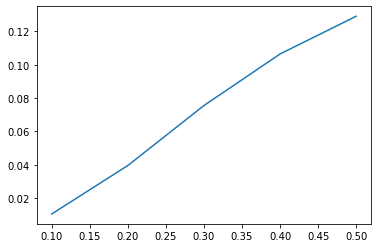

In [73]:
n = 1000 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

var = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
MSE = np.zeros(len(var))

for ind, variance in enumerate(var):

    y = np.random.normal(loc=0.5, scale = variance, size=xx1.shape)
    y[np.where(y>1.0)] = 1.0
    y[np.where(y<0.0)] = 0.0

    print("mean of the output is ", np.mean(y))
    print("variance of the output is ", np.var(y))

    print("fitting a constant")
    linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 
    linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")

    print("Train MSE", linear_reg.trainMSE)
    print("Test MSE", linear_reg.testMSE)
    print("Train R2", linear_reg.trainR2)
    print("Test R2", linear_reg.testR2)
    print("Test bias", linear_reg.testbias)
    print("Test model variance", linear_reg.testvar)

    print("fitting a 10th order polynomial")
    linear_reg.apply_leastsquares(order=10, test_ratio=0.1, reg_method="ols")

    print("Train MSE", linear_reg.trainMSE)
    print("Test MSE", linear_reg.testMSE)
    print("Train R2", linear_reg.trainR2)
    print("Test R2", linear_reg.testR2)
    print("Test bias", linear_reg.testbias)
    print("Test model variance", linear_reg.testvar)
    
    MSE[ind] = linear_reg.testMSE

plt.plot(var, MSE)

## Fitting a 2D gaussian function

# Bias Variance Tradeoff

In [74]:
#loading data
method = "ols"
order=np.load("data_linear_regression/order.npy")
num_points=np.load("data_linear_regression/num_points.npy")
noise_var=np.load("data_linear_regression/noise_var.npy")
test_ratio_array=np.load("data_linear_regression/test_ratio_array.npy")
ridge_lambda=np.load("data_linear_regression/ridge_lambda.npy")
k_folds=np.load("data_linear_regression/k_folds.npy")
n_boots=np.load("data_linear_regression/n_boots.npy")
train_MSE=np.load("data_linear_regression/train_MSE"+method+".npy")
test_MSE=np.load("data_linear_regression/test_MSE"+method+".npy")
train_R2=np.load("data_linear_regression/train_R2"+method+".npy")
test_R2=np.load("data_linear_regression/test_R2"+method+".npy")
test_bias=np.load("data_linear_regression/test_bias"+method+".npy")
test_var=np.load("data_linear_regression/test_variance"+method+".npy")

FileNotFoundError: [Errno 2] No such file or directory: 'data_linear_regression/test_ratio_array.npy'

For Ordinary least squares, we find the bias variance tradeoff as a function of model complexity: order of polynomial. We determine it for fixed test ratio and noise level

In [ ]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_bias, 'k', label = "bias")
ax.plot(order, ols_var, 'b', label = "variance")
ax.legend()
ax.set_xlabel("order of ploynomial")

def plotOLSstats(num_point, test_ratio, var):
    n_ind = 0
    for i in range(len(num_points)):
        if num_point == num_points[i]:
            n_ind = i
    r_ind = 0
    for i in range(len(test_ratio_array)):
        if test_ratio == test_ratio_array[i]:
            r_ind = i
    noise_ind = 0
    for i in range(len(noise_var)):
        if var == noise_var[i]:
            r_ind = i
            
    ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0]
    ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0]

    fig, ax = plt.subplots()
    ax.plot(order, ols_bias, 'k', label = "bias")
    ax.plot(order, ols_var, 'b', label = "variance")
    ax.legend()
    ax.set_xlabel("order of ploynomial")
    
widget.interact(plotOLSstats, num_point=num_points.tolist(), 
                test_ratio=test_ratio_array.tolist(), var=noise_var.tolist())

In [ ]:
r_ind = 0 # r=0.1
n_ind = 0 # n=100
noise_ind = 4 #noise variance = 0.5
ols_testMSE = test_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_trainMSE = train_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_testMSE, 'k')
ax.plot(order, ols_trainMSE, 'b')

In [ ]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_bias, 'k')
ax.plot(order, ols_var, 'b')

In [ ]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_testMSE = test_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_trainMSE = train_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_testMSE, 'k', label="testMSE")
ax.plot(order, ols_trainMSE, 'b', label="trainMSE")
ax.legend()

## Functions of model complexity for OLS

In [ ]:
def OLS_study(n, var, r):
    n=np.array([n])
    var=np.array([var])
    r=np.array([r])
    print(var)
    order = np.arange(1,15)
    method="ols"
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, n, noise_var = var, test_ratio_array=r)
    print(order.shape)
    fig, ax = plt.subplots(3,1, figsize=(8,8))
    ax[0].plot(order, train_MSE[:,0,0,0,0,0,0,0], 'k', label="train MSE")
    ax[0].plot(order, test_MSE[:,0,0,0,0,0,0,0], 'b', label="test MSE")
    ax[1].plot(order, test_bias[:,0,0,0,0,0,0,0], 'k', label="bias")
    ax[1].plot(order, test_var[:,0,0,0,0,0,0,0], 'b', label="variance")
    ax[2].plot(order, train_R2[:,0,0,0,0,0,0,0], 'k', label="train R2")
    ax[2].plot(order, test_R2[:,0,0,0,0,0,0,0], 'b', label="test R2")
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
widget.interact(OLS_study, n=(10,200,10), var=(0,1,0.1), r=(0.1,0.5,0.1))

In [ ]:
def lasso_study(n, var, r, lam):
    n = np.array([n])
    var = np.array([var])
    r = np.array([r])
    lam = np.array([lam])
    order = np.arange(1,11)
    method = "lasso"
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, n, var,
                                                                                   r, lasso_lambda=lam, reg_type="lasso")
    fig, ax = plt.subplots(3,1, figsize=(8,8))
    ax[0].plot(order, train_MSE[:,0,0,0,0,0,0,0], 'k', label="train MSE")
    ax[0].plot(order, test_MSE[:,0,0,0,0,0,0,0], 'b', label="test MSE")
    ax[1].plot(order, test_bias[:,0,0,0,0,0,0,0], 'k', label="bias")
    ax[1].plot(order, test_var[:,0,0,0,0,0,0,0], 'b', label="variance")
    ax[2].plot(order, train_R2[:,0,0,0,0,0,0,0], 'k', label="train R2")
    ax[2].plot(order, test_R2[:,0,0,0,0,0,0,0], 'b', label="test R2")
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
import warnings
warnings.filterwarnings("ignore")
widget.interact(lasso_study, n=(10,50,10), var=(0,1,0.25), r=(0.1,0.5,0.1), lam=np.logspace(-5,0,11).tolist())

# Visualisation of Noise

In [ ]:
n = 100 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

y = franke.Franke(xx1, xx2, noise_var=0.4) #zero mean gaussian noise
xx1 = xx1.reshape([n,n])
xx2 = xx2.reshape([n,n])

y = y.reshape(n,n)

#rescaling y
y = (y-np.amin(y))/(np.amax(y)-np.amin(y))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))
#ax.plot_surface(xx1, xx2, y, rstride=8, cstride=8, alpha=0.2, cmap=cm.coolwarm)
cset = ax.contour(xx1, xx2, y, zdir='z', offset=0, cmap=cm.coolwarm)
cset = ax.contour(xx1, xx2, y, zdir='x', offset=0, cmap=cm.coolwarm_r)
cset = ax.contour(xx1, xx2, y, zdir='y', offset=1, cmap=cm.coolwarm_r)


In [ ]:
n = 300 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

noise_var = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])

fig, ax = plt.subplots(2, 3,subplot_kw={"projection": "3d"}, figsize=(12,8))
for ind, var in enumerate(noise_var):
    y = franke.Franke(xx1, xx2, noise_var=var) #zero mean gaussian noise
    xx1 = xx1.reshape([n,n])
    xx2 = xx2.reshape([n,n])

    y = y.reshape(n,n)
    #rescaling y
    y = (y-np.amin(y))/(np.amax(y)-np.amin(y))
    
    if(ind<3): a = 0 
    else: a = 1

    #ax[a, ind%3].plot_surface(xx1, xx2, y, rstride=8, cstride=8, alpha=0.2, cmap=cm.coolwarm)
    ax[a, ind%3].title.set_text(str(var))
    cset = ax[a, ind%3].contourf(xx1, xx2, y, zdir='z', offset=0, cmap=cm.coolwarm)
    cset = ax[a, ind%3].contour(xx1, xx2, y, zdir='x', offset=0, cmap=cm.coolwarm_r)
    cset = ax[a, ind%3].contour(xx1, xx2, y, zdir='y', offset=1, cmap=cm.coolwarm_r)


We can see above that for variance > 0.2 the noisy franke function appears incomprehensible compared to the noiseless one

# Corrections to bias

When calculating bias we have to remove the variance of the noise. However, as we are scaling the noise before we add it to the data, our true variance is different from the variance we used to find the noise to Franke data. 

Now, we have two options. 
1: Scaling "y" doesn't affect the bias.
2: Scaling "y" does affect the bias.

## Scaling "y" doesn't affect the bias calculation

In [ ]:
n = 100 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

design_var = np.arange(0.0,2.0,0.1)
true_var = np.zeros(len(design_var))
for i, v in enumerate(var):
    y, true_var[i] = franke.Franke_and_biascorrection(xx1, xx2, noise_var=v) #zero mean gaussian noise has variance = var    
print(true_var)
print(design_var)
fig, ax = plt.subplots()
ax.plot(design_var, true_var)
ax.set_xlabel("noise variance")
ax.set_ylabel("true variance")


In [ ]:
def OLS_study(n, var, r):
    n=np.array([n])
    print(np.ceil((var-0.001)*10))
    err = true_var[int(np.ceil((var-0.001)*10))]
    
    var=np.array([var])
    r=np.array([r])
    print(var)
    order = np.arange(1,15)
    method="ols"
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, n, noise_var = var, test_ratio_array=r)
    print(order.shape)
    fig, ax = plt.subplots(3,1, figsize=(8,8))
    ax[0].plot(order, train_MSE[:,0,0,0,0,0,0,0], 'k', label="train MSE")
    ax[0].plot(order, test_MSE[:,0,0,0,0,0,0,0], 'b', label="test MSE")
    ax[1].plot(order, test_bias[:,0,0,0,0,0,0,0]-err, 'k', label="bias")
    ax[1].plot(order, test_var[:,0,0,0,0,0,0,0], 'b', label="variance")
    ax[2].plot(order, train_R2[:,0,0,0,0,0,0,0], 'k', label="train R2")
    ax[2].plot(order, test_R2[:,0,0,0,0,0,0,0], 'b', label="test R2")
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
widget.interact(OLS_study, n=(10,200,10), var=(0,1,0.1), r=(0.1,0.5,0.1))

## Scaling "y" does affect the bias calculation

In [ ]:
n = 100 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

design_var = np.arange(0.0,2.0,0.1)
true_var = np.zeros(len(design_var))
for i, v in enumerate(var):
    y, true_var[i] = franke.Franke_and_biascorrection(xx1, xx2, noise_var=v) #zero mean gaussian noise has variance = var    
print(np.amax(y))
true_var = true_var/np.amax(y)
print(true_var)
print(design_var)
fig, ax = plt.subplots()
ax.plot(design_var, true_var)
ax.set_xlabel("noise variance")
ax.set_ylabel("true variance")


In [ ]:
def OLS_study(n, var, r):
    n=np.array([n])
    print(np.ceil((var-0.001)*10))
    err = true_var[int(np.ceil((var-0.001)*10))]
    
    var=np.array([var])
    r=np.array([r])
    print(var)
    order = np.arange(1,15)
    method="ols"
    train_MSE, test_MSE, train_R2, test_R2, test_bias, test_var = apply_regression(order, n, noise_var = var, test_ratio_array=r)
    print(order.shape)
    fig, ax = plt.subplots(3,1, figsize=(8,8))
    ax[0].plot(order, train_MSE[:,0,0,0,0,0,0,0], 'k', label="train MSE")
    ax[0].plot(order, test_MSE[:,0,0,0,0,0,0,0], 'b', label="test MSE")
    ax[1].plot(order, test_bias[:,0,0,0,0,0,0,0]-err, 'k', label="bias")
    ax[1].plot(order, test_var[:,0,0,0,0,0,0,0], 'b', label="variance")
    ax[2].plot(order, train_R2[:,0,0,0,0,0,0,0], 'k', label="train R2")
    ax[2].plot(order, test_R2[:,0,0,0,0,0,0,0], 'b', label="test R2")
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
widget.interact(OLS_study, n=(10,200,10), var=(0,1,0.1), r=(0.1,0.5,0.1))